# Accuracy Plot Generator

This notebook reads accuracy data from `data.yml`, creates a bar plot visualization, and saves it as an image asset.

## Import Required Libraries

In [24]:
import yaml
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path

## Load YAML Data

In [25]:
# Load the data from YAML file
with open("data.yml", "r") as file:
    data = yaml.safe_load(file)

# Display the loaded data
print("Loaded accuracies:")
print(data["accuracies"])

Loaded accuracies:
{'p1': {0: 0.9631, 1: 0.9712, 2: 0.8967, 3: 0.8993, 4: 0.9263}, 'p2': {5: 0.8547, 6: 0.9586, 7: 0.9383, 8: 0.925, 9: 0.8604}}


## Extract and Prepare Accuracy Data

In [26]:
# Extract accuracies from both p1 and p2
accuracies = data["accuracies"]

# Combine all accuracies in order
folds = []
accuracy_values = []

for phase in ["p1", "p2"]:
    for fold, acc in sorted(accuracies[phase].items()):
        folds.append(int(fold))
        accuracy_values.append(acc)

print(f"Folds: {folds}")
print(f"Accuracies: {accuracy_values}")

Folds: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
Accuracies: [0.9631, 0.9712, 0.8967, 0.8993, 0.9263, 0.8547, 0.9586, 0.9383, 0.925, 0.8604]


## Create and Customize Bar Plot

Plot saved to: assets/accuracies_barplot.png


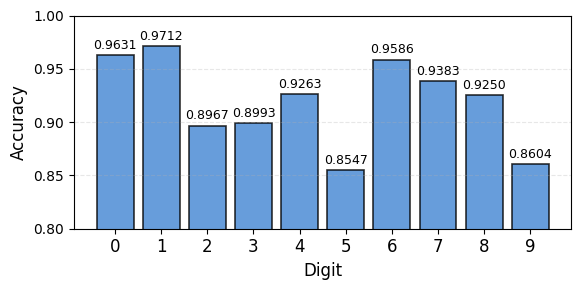

In [36]:
# Create assets directory if it doesn't exist
assets_dir = Path("assets")
assets_dir.mkdir(exist_ok=True)

# Create figure and axis
fig, ax = plt.subplots(figsize=(6, 3))

# Create bar plot with custom colors
bars = ax.bar(
    folds, accuracy_values, color="#4185D3", alpha=0.8, edgecolor="black", linewidth=1.2
)

# Customize plot appearance
ax.set_xlabel("Digit", fontsize=12)
ax.set_ylabel("Accuracy", fontsize=12)
ax.set_xticks(folds, labels=[f"{fold}" for fold in folds], fontsize=12)
ax.set_ylim([0.8, 1.0])
ax.grid(axis="y", alpha=0.3, linestyle="--")

# Add value labels on top of bars
for i, (fold, acc) in enumerate(zip(folds, accuracy_values)):
    ax.text(
        fold,
        acc + 0.003,
        f"{acc:.4f}",
        ha="center",
        va="bottom",
        fontsize=9,
    )

plt.tight_layout()

output_path = assets_dir / "accuracies_barplot.png"
plt.savefig(output_path, dpi=500, bbox_inches="tight")
print(f"Plot saved to: {output_path}")

plt.show()